In [1]:
import numpy as np
import time

from Functions.Metropolis import *
from Functions.errorcalc import *
from Functions.PlotFigures import *
import Systems.HarmonicOscillator  as Oscillator
import Systems.Hatom as Hydrogen
import Systems.Helium as Helium




def VMC(N_walkers, N_tries, System, plots, subplots):
    start_time = time.time()
    
    alpha = System.alpha_broad
    D = System.dimension

    E_a = np.zeros(len(alpha))
    E_var = np.zeros(len(alpha))
    E_error = np.zeros(len(alpha))
    var_error = np.zeros(len(alpha))

    for i in range(len(alpha)):
        f = lambda R: System.trialWaveFunction(alpha[i],  R)

        rn, accept_rate = metropolisAlgorithm(f, N_tries, N_walkers, D)
        E = System.E_loc(alpha[i], rn)
        E_a[i] = np.mean(E)
        E_error[i], E_var[i], var_error[i] = bootstrapError(E[:,0], 100)

    print(f"Acceptance rate : {accept_rate}")

    if plots == True and subplots == False:
        plotEnergy(alpha, E_a, E_error)
        plotVariance(alpha, E_var, var_error)
        
    elif plots == False and subplots == True:
        subplotEnergyVariance(alpha, E_a, E_error, E_var, var_error)
    
    elapsed_time = time.time() - start_time
    print(f"time taken for simulation : {elapsed_time} s")






This cell gives the energy and variance of the harmonic oscilator in 1D:

Acceptance rate : 0.832712


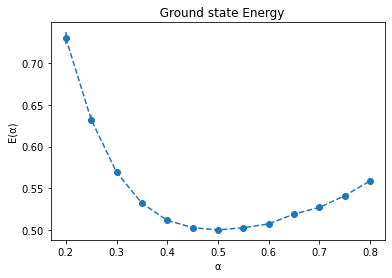

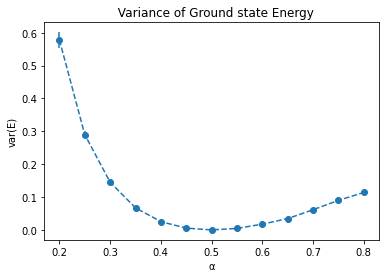

time taken for simulation : 6.785670280456543 s


In [6]:
print("This cell gives the energy and variance of the harmonic oscilator in 1D:")
print()

# Simulation parameters
System = Oscillator
N_tries = 10000
N_walkers = 50
plots = True
subplots = False

VMC(N_walkers, N_tries, System, plots, subplots)

This cell gives the energy and variance of the Hydrogen atom in 3D:

Acceptance rate : 0.6819026666666667


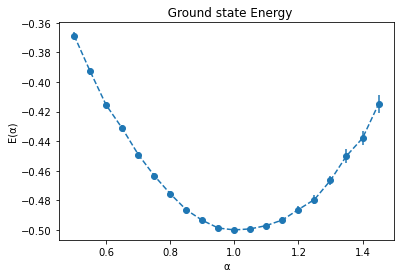

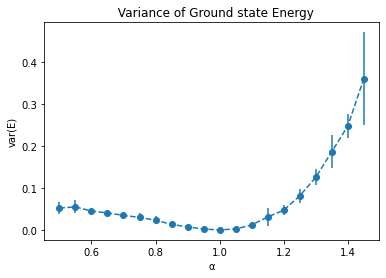

time taken for simulation : 17.556092262268066 s


In [7]:
print("This cell gives the energy and variance of the Hydrogen atom in 3D:")
print()

# Simulation parameters
System = Hydrogen
N_tries = 10000
N_walkers = 50
plots = True
subplots = False

VMC(N_walkers, N_tries, System, plots, subplots)

This cell gives the energy and variance of the Helium atom in 3D:

Acceptance rate : 0.4757100138888889


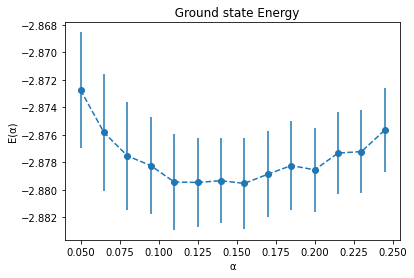

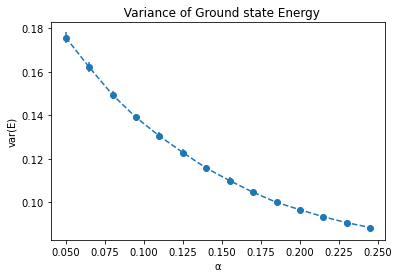

time taken for simulation : 305.11674666404724 s


In [5]:
print("This cell gives the energy and variance of the Helium atom in 3D:")
print()

# Simulation parameters
System = Helium
N_tries = 30000
N_walkers = 400
plots = True
subplots = False

VMC(N_walkers, N_tries, System, plots, subplots)